In [1]:
import scipy as sc
from scipy.stats import norm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

from bs4 import BeautifulSoup
import requests
import re

In [2]:
def get_data_from_soup(input_soup):
    set = []
    soup_body = input_soup.body
    
    
    for tag in soup_body.find_all(class_="athing") :
        rank = int(tag.find(class_="rank").text[:-1])
        length = len(tag.find(class_="storylink").text)
    
        secondSection = tag.find_next_sibling()
    
        age = secondSection.find(class_="age").text
        if "hour" in age:
            age = int(age.split(" ")[0])
        elif "day" in age:
            age = int(age.split(" ")[0])*24
        elif "minute" in age:
            age = round(float(age.split(" ")[0])/60, 2)
        
        try:
            points = int(secondSection.find(class_="score").text.split(" ")[0])
        except:
            points = 0
            
        try:
            numComments = int(secondSection.find('a', text = re.compile('.*comments.*')).text.split('comments')[0].strip())
        except:
            numComments = 0
    
        set.append([rank, length, age, points, numComments])
    
    return set

In [3]:
set = []
numPages = 5;

for x in range(numPages):
    try:
        soup = BeautifulSoup(requests.get("https://news.ycombinator.com/news?p=" + str(x+1)).content, "html.parser")
        set += get_data_from_soup(soup)
    except requests.ConnectionError:
        print("No internet connection - closing...")
        exit()

# print(set)

In [4]:
df = pd.DataFrame(set, columns = ['Rank', 'TitleLen', "AgeHours", "Points", "NumComments"]) 

# print(df)

In [5]:
df.to_csv('hackerNews.csv', index = None, header=True)

In [6]:
df = pd.read_csv('hackerNews.csv')

# print(df)

     Rank  TitleLen  AgeHours  Points  NumComments
0       1        78       1.0     134           37
1       2        47       1.0      44            4
2       3        67       6.0     385           98
3       4        48       3.0     133           56
4       5        74       4.0      96           22
5       6        69       2.0      52            3
6       7        59       7.0     200           82
7       8        58       5.0     119           50
8       9        79       3.0      50            8
9      10        54       7.0     191           87
10     11        48       1.0      26            9
11     12        18       5.0     122           82
12     13        70      11.0     329           86
13     14        22       3.0      54           11
14     15        57       8.0     165          221
15     16        41       3.0      43            7
16     17        60       2.0      19            4
17     18        70       3.0     108           77
18     19        58       9.0  

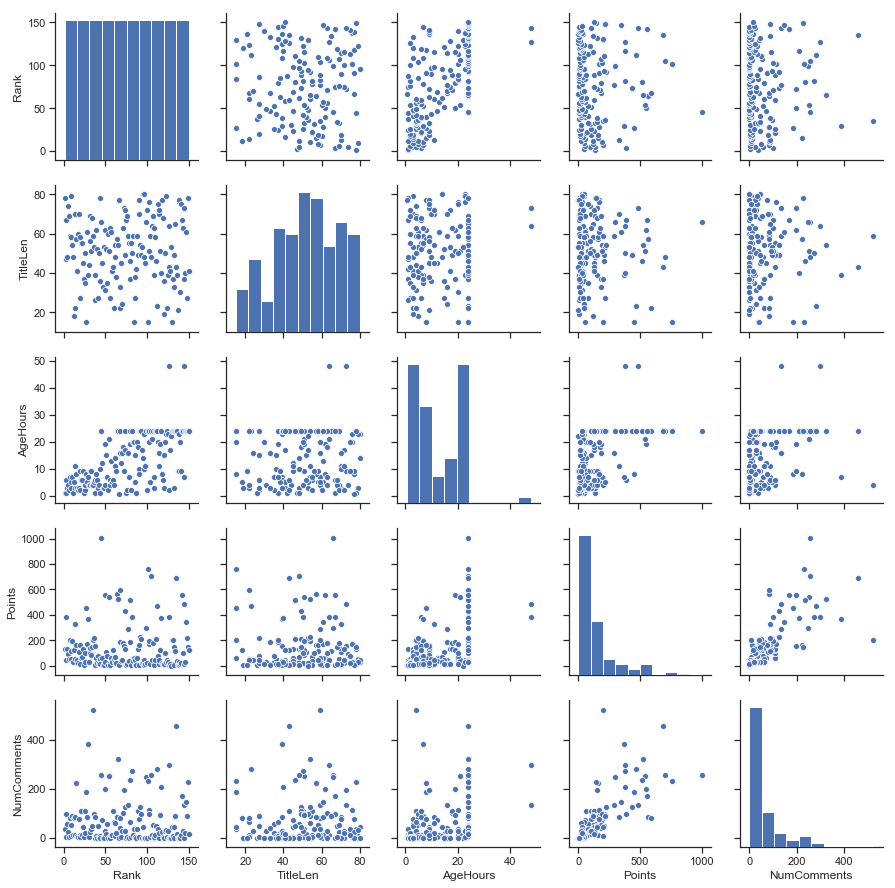

In [7]:
sns.set(style="ticks")
sns.pairplot(df);

**Nothing really obvious jumps out as a great predictor of rank...  Maybe age in hours has an inverse relationship?**

In [8]:
rankOLS = sm.ols(formula="Rank ~ TitleLen + AgeHours + Points + NumComments", data=df).fit()
rankOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     37.68
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.38e-21
Time:                        14:51:44   Log-Likelihood:                -724.61
No. Observations:                 150   AIC:                             1459.
Df Residuals:                     145   BIC:                             1474.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      45.1018      8.682      5.195      0.000      27.941      62.262
TitleLen       -0.0881      0.149     -0.590      0.556      -0.383       0.207
AgeHours        3.8483      0.314     12.269      0.000       3.228       4.468
Points         -0.0987      0.023     -4.266      0.000      -0.144      -0.053
NumComments     0.0001      0.041      0.003      0.998      -0.081       0.081
==============================================================================
Omnibus:                       11.893   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.187
Skew:                           0.724   Prob(JB):                      0.00137
Kurtosis:                       2.889   Cond. No.                         870.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Taking everything together gives an r-squared of .619 which is not fantastic, but probably not nothing either.**

**It appears that TitleLen and NumComments don't have much bearing on the rank**

In [9]:
rankOLS = sm.ols(formula="Rank ~ TitleLen + AgeHours + Points", data=df).fit()
rankOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     50.59
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.77e-22
Time:                        14:51:44   Log-Likelihood:                -724.61
No. Observations:                 150   AIC:                             1457.
Df Residuals:                     146   BIC:                             1469.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.1019      8.653      5.213      0.000      28.001      62.202
TitleLen      -0.0881      0.149     -0.592      0.555      -0.382       0.206
AgeHours       3.8483      0.313     12.314      0.000       3.231       4.466
Points        -0.0986      0.016     -6.065      0.000      -0.131      -0.066
==============================================================================
Omnibus:                       11.893   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.187
Skew:                           0.724   Prob(JB):                      0.00137
Kurtosis:                       2.889   Cond. No.                         799.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
rankOLS = sm.ols(formula="Rank ~ AgeHours + Points + NumComments", data=df).fit()
rankOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     50.35
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           2.10e-22
Time:                        14:51:44   Log-Likelihood:                -724.79
No. Observations:                 150   AIC:                             1458.
Df Residuals:                     146   BIC:                             1470.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      40.6437      4.256      9.550      0.000      32.232      49.055
AgeHours        3.8386      0.313     12.283      0.000       3.221       4.456
Points         -0.0976      0.023     -4.242      0.000      -0.143      -0.052
NumComments    -0.0012      0.041     -0.030      0.976      -0.082       0.080
==============================================================================
Omnibus:                       11.759   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.976
Skew:                           0.719   Prob(JB):                      0.00152
Kurtosis:                       2.919   Cond. No.                         424.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Both NumComments and TitleLen appear to have very high P values, even when taken independently - they should be removed from the model**

In [11]:
rankOLS = sm.ols(formula="Rank ~ AgeHours + Points", data=df).fit()
rankOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     76.04
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           2.12e-23
Time:                        14:51:44   Log-Likelihood:                -724.79
No. Observations:                 150   AIC:                             1456.
Df Residuals:                     147   BIC:                             1465.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.6304      4.218      9.632      0.000      32.294      48.967
AgeHours       3.8388      0.311     12.327      0.000       3.223       4.454
Points        -0.0981      0.016     -6.055      0.000      -0.130      -0.066
==============================================================================
Omnibus:                       11.761   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.976
Skew:                           0.719   Prob(JB):                      0.00152
Kurtosis:                       2.920   Cond. No.                         387.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**After removing TitleLen and NumComments our r-squared barely changed**

**It seems like rank is based off of its age in hours (with a strong positive correlation) and its number of points (with a weaker negative correlation).  As time goes on it gets dramatically harder for post to maintain itself on the front page.**

**This seems like far and away the best model of the ones we tried and it seems like both of the variables have a relationship to rank, even if ageHours is much stronger**

In [12]:
frontPageList = [];
for i in df['Rank']:
    if i <= 30:
        frontPageList.append(1);
    else:
        frontPageList.append(0);

df.insert(len(df.columns), "FrontPage", frontPageList)

In [13]:
rankLogistic = sm.logit(formula='FrontPage ~ AgeHours + Points', data=df).fit()
rankLogistic.summary()

Optimization terminated successfully.
         Current function value: 0.305240
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              FrontPage   No. Observations:                  150
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 Jun 2019   Pseudo R-squ.:                  0.3900
Time:                        14:51:44   Log-Likelihood:                -45.786
converged:                       True   LL-Null:                       -75.060
                                        LLR p-value:                 1.933e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6405      0.400      1.600      0.110      -0.144       1.425
AgeHours      -0.4485      0.103     -4.339      0.000      -0.651      -0.246
Points         0.0105      0.003      3.699      0.000       0.005       0.016
==============================================================================
"""

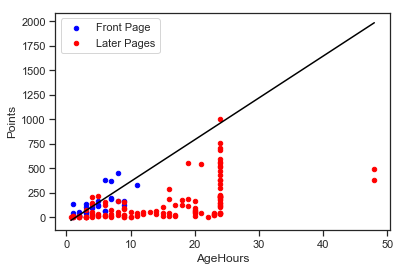

In [14]:
odds = lambda p: p/(1-p)
logit = lambda p: sc.log(odds(p))

ax = df[df['FrontPage']==1].plot.scatter(x='AgeHours', y='Points', color='blue', label='Front Page');
df[df['FrontPage']==0].plot.scatter(x='AgeHours', y='Points', color='red', label='Later Pages', ax=ax);

x = np.linspace(df['AgeHours'].min(), df['AgeHours'].max(), 1000)
par = rankLogistic.params

plt.plot(x,(1/par['Points'])*(logit(.5) - par['Intercept'] - par['AgeHours']*x),color='Black')
plt.show()

In [15]:
df['FrontPagePredictions'] = rankLogistic.predict()>.5
pd.crosstab(index=df["FrontPage"], columns=df["FrontPagePredictions"])

FrontPagePredictions,False,True
FrontPage,,
0,109,11
1,18,12


**Since Age in Hours seems to have a more substantial impact on our Front Page Status it's worth doing a single variable regression as well:**

In [16]:
rankLogistic = sm.logit(formula='FrontPage ~ AgeHours', data=df).fit()
rankLogistic.summary()

Optimization terminated successfully.
         Current function value: 0.368461
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              FrontPage   No. Observations:                  150
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Jun 2019   Pseudo R-squ.:                  0.2637
Time:                        14:51:45   Log-Likelihood:                -55.269
converged:                       True   LL-Null:                       -75.060
                                        LLR p-value:                 3.145e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4981      0.378      1.319      0.187      -0.242       1.238
AgeHours      -0.2288      0.054     -4.210      0.000      -0.335      -0.122
==============================================================================
"""

**It's worth noting that our r-squared value does take a somewhat substantial hit working with just Age in Hours...**

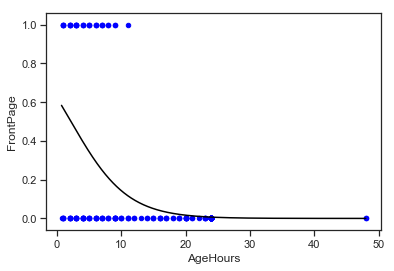

In [17]:
logistic = lambda x: 1/(1+sc.exp(-x))

df.plot.scatter(x='AgeHours', y='FrontPage', color='blue');

x = sc.linspace(df['AgeHours'].min(), df['AgeHours'].max(), 1000);
par = dict(rankLogistic.params);
plt.plot(x, logistic(par['Intercept'] + par['AgeHours']*x), color='Black');
plt.show()

In [18]:
df['FrontPagePredictions'] = rankLogistic.predict()>.5
pd.crosstab(index=df["FrontPage"], columns=df["FrontPagePredictions"])

FrontPagePredictions,False,True
FrontPage,,
0,110,10
1,22,8


**Even with two variables, our model doesn't seem to be exceptionally predictive of what it takes to get to the front page - we only got correct predictions of front page submissions 12/30 times, our single variable model did even worse with 8/30 correct predictions**